In [35]:
#%matplotlib inline
import pandas as pd

pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import json

In [36]:
df = pd.read_pickle('../data/processed/linear_regression.pkl')
df

,index,migration_atom,migration_system,migration_barriers,energy_difference,e0,energy_start,energy_end,distance,min_erg_distance,saddle_force,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,bond_change_encode_forward,bond_change_encode_backward,distance_list,energy_list
0,0,Mg,Al-Mg,0.481830,0.135878,0.413891,-920.683419,-920.547541,2.552011,2.734474,-0.011205,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.474418, 0.953709, 1.433063, 1.86359, 2...","[0.0, 0.11896099999999998, 0.362717, 0.4818300..."
1,0,Mg,Al-Mg,0.345952,-0.135878,0.413891,-920.547541,-920.683419,2.552011,2.734474,-0.011205,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.43578300000000025, 0.870884, 1.301411,...","[0.0, 0.08485800000000002, 0.262621, 0.3459520..."
2,1,Al,Al-Mg,0.728938,0.107344,0.675266,-920.683419,-920.576074,3.116576,3.516250,0.013488,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0...","[0.0, 0.5736899999999999, 1.146443, 1.71742000...","[0.0, 0.203801, 0.574377, 0.728938, 0.574531, ..."
3,1,Al,Al-Mg,0.621594,-0.107344,0.675266,-920.576074,-920.683419,3.116576,3.516250,0.013488,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[0.0, 0.597289, 1.195427, 1.7988299999999997, ...","[0.0, 0.17705700000000002, 0.467187, 0.621594,..."
4,2,Al,Al-Mg,0.782146,0.154622,0.704835,-920.683419,-920.528797,3.036882,3.395988,0.010134,"[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1361.0, 149.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0...","[0.0, 0.56975, 1.1402649999999999, 1.707865000...","[0.0, 0.193126, 0.601198, 0.782146, 0.623641, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,1127,Zn,Al-Zn,0.242831,-0.064467,0.275064,-918.902771,-918.967238,2.694549,2.818239,-0.017111,"[0.5, 0.0, 0.5, 0.25, 0.0, 0.75, 0.0, 0.0, 1.0...","[0.5, 0.0, 0.5, 0.25, 0.0, 0.75, 0.0, 0.0, 1.0...","[1375.0, 0.0, 134.0, 0.0, 0.0, 15.0, 688.0, 0....","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[0.0, 0.0, 2.0, 0.0, 0.0, -2.0, 0.0, 0.0, -2.0...","[0.0, 0.0, -2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0,...","[0.0, 0.4598950000000004, 0.9192930000000001, ...","[0.0, 0.076431, 0.19431500000000002, 0.2428310..."
2256,1128,Zn,Al-Zn,0.266368,0.008176,0.262280,-918.967238,-918.959061,2.707104,2.829264,-0.002542,"[0.25, 0.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[0.25, 0.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.470555, 0.9441200000000001, 1.419331, ...","[0.0, 0.08352799999999999, 0.210982, 0.266368,..."
2257,1128,Zn,Al-Zn,0.258192,-0.008176,0.2622

In [37]:
df.describe()

,index,migration_barriers,energy_difference,e0,energy_start,energy_end,distance,min_erg_distance,saddle_force
count,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000
mean,564.500000,0.491016,0.000000,0.491016,-890.868245,-890.868245,2.827580,3.112723,-0.001979
std,326.274967,0.247914,0.106702,0.242106,35.273761,35.273761,0.221493,0.333046,0.012521
min,0.000000,0.001193,-0.485086,0.049129,-950.776122,-950.776122,1.648657,1.678236,-0.048896
25%,282.000000,0.353279,-0.061360,0.356723,-918.089132,-918.089132,2.709703,2.909910,-0.008059
50%,564.500000,0.488042,0.000000,0.484492,-896.339136,-896.339136,2.784923,3.041990,-0.000896
75%,847.000000,0.597518,0.061360,0.589368,-860.772478,-860.772478,2.965851,3.304062,0.004562
max,1129.000000,4.607260,0.485086,4.547388,-801.581643,-801.581643,3.487110,4.671070,0.049043


In [38]:
df = pd.read_pickle('../data/processed/linear_regression.pkl')
DIMENSION_E0 = len(df.at[0, 'one_hot_encode_forward'])
DIMENSION_E = len(df.at[0, 'energy_encode_start'])

# df = df[556*2:2260]
df = df[:2260]
df = df[df['migration_barriers'] < 1.1]
df[((df['energy_difference'] - df['energy_difference'].mean()) / df['energy_difference'].std()).abs() < 2]
df[((df['migration_barriers'] - df['migration_barriers'].mean()) / df['migration_barriers'].std()).abs() < 2]
print(f'Dimensionality {DIMENSION_E0} {DIMENSION_E}')
df

Dimensionality 522 42


,index,migration_atom,migration_system,migration_barriers,energy_difference,e0,energy_start,energy_end,distance,min_erg_distance,saddle_force,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,bond_change_encode_forward,bond_change_encode_backward,distance_list,energy_list
0,0,Mg,Al-Mg,0.481830,0.135878,0.413891,-920.683419,-920.547541,2.552011,2.734474,-0.011205,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.474418, 0.953709, 1.433063, 1.86359, 2...","[0.0, 0.11896099999999998, 0.362717, 0.4818300..."
1,0,Mg,Al-Mg,0.345952,-0.135878,0.413891,-920.547541,-920.683419,2.552011,2.734474,-0.011205,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.43578300000000025, 0.870884, 1.301411,...","[0.0, 0.08485800000000002, 0.262621, 0.3459520..."
2,1,Al,Al-Mg,0.728938,0.107344,0.675266,-920.683419,-920.576074,3.116576,3.516250,0.013488,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0...","[0.0, 0.5736899999999999, 1.146443, 1.71742000...","[0.0, 0.203801, 0.574377, 0.728938, 0.574531, ..."
3,1,Al,Al-Mg,0.621594,-0.107344,0.675266,-920.576074,-920.683419,3.116576,3.516250,0.013488,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[0.0, 0.597289, 1.195427, 1.7988299999999997, ...","[0.0, 0.17705700000000002, 0.467187, 0.621594,..."
4,2,Al,Al-Mg,0.782146,0.154622,0.704835,-920.683419,-920.528797,3.036882,3.395988,0.010134,"[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1361.0, 149.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0...","[0.0, 0.56975, 1.1402649999999999, 1.707865000...","[0.0, 0.193126, 0.601198, 0.782146, 0.623641, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,1127,Zn,Al-Zn,0.242831,-0.064467,0.275064,-918.902771,-918.967238,2.694549,2.818239,-0.017111,"[0.5, 0.0, 0.5, 0.25, 0.0, 0.75, 0.0, 0.0, 1.0...","[0.5, 0.0, 0.5, 0.25, 0.0, 0.75, 0.0, 0.0, 1.0...","[1375.0, 0.0, 134.0, 0.0, 0.0, 15.0, 688.0, 0....","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[0.0, 0.0, 2.0, 0.0, 0.0, -2.0, 0.0, 0.0, -2.0...","[0.0, 0.0, -2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0,...","[0.0, 0.4598950000000004, 0.9192930000000001, ...","[0.0, 0.076431, 0.19431500000000002, 0.2428310..."
2256,1128,Zn,Al-Zn,0.266368,0.008176,0.262280,-918.967238,-918.959061,2.707104,2.829264,-0.002542,"[0.25, 0.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[0.25, 0.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.470555, 0.9441200000000001, 1.419331, ...","[0.0, 0.08352799999999999, 0.210982, 0.266368,..."
2257,1128,Zn,Al-Zn,0.258192,-0.008176,0.2622

In [39]:
df.describe()

,index,migration_barriers,energy_difference,e0,energy_start,energy_end,distance,min_erg_distance,saddle_force
count,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000
mean,565.524043,0.480934,-0.000335,0.481101,-891.059308,-891.059643,2.824588,3.107733,-0.002024
std,326.564597,0.178687,0.106046,0.171184,35.198720,35.198688,0.218764,0.327644,0.012538
min,0.000000,0.001193,-0.485086,0.049129,-950.776122,-950.776122,1.648657,1.678236,-0.048896
25%,283.000000,0.352730,-0.061298,0.355311,-918.114133,-918.114133,2.709144,2.907990,-0.008089
50%,566.000000,0.487224,-0.000006,0.482907,-898.534050,-898.534050,2.784174,3.040823,-0.000931
75%,848.750000,0.595407,0.060230,0.586979,-860.857526,-860.857526,2.963453,3.299933,0.004532
max,1129.000000,1.077400,0.485086,1.150037,-801.581643,-801.581643,3.487110,4.671070,0.049043


In [40]:
# a,b = np.stack(df['one_hot_encode_forward']), np.stack(df['one_hot_encode_backward'])
# (a-b)[3,:]

In [41]:
# np.linalg.norm(a-b)

In [42]:
df = df.sample(frac=1, random_state=0)
df_copy = df.drop_duplicates(subset=['migration_atom', 'energy_start'])
# df_copy = df

In [43]:
# TEST_SIZE = 100

# x_train, y_train = np.stack(df_copy[:-TEST_SIZE]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE]['energy_start'])

# df_train, df_test = df[:-TEST_SIZE], df[-TEST_SIZE:]

# x_train_Al, y_train_Al = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Mg, y_train_Mg = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Zn, y_train_Zn = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])


# x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE:]['energy_start'])

# x_test_Al, y_test_Al = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Mg, y_test_Mg = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Zn, y_test_Zn = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])

In [44]:
def Get3ptsLandauFit(row):
    distance_list = row["distance_list"]
    energy_list = row["energy_list"]
    E_end = energy_list[-1]
    D_end = distance_list[-1]
    i = np.argmax(energy_list)

    E_tran = energy_list[i]
    D_tran = distance_list[i]
    A = np.array([[D_end**4, D_end**3, D_end**2], 
                  [4*D_end**3, 3*D_end**2, 2*D_end], 
                  [D_tran**4, D_tran**3, D_tran**2]])
    b = np.array([E_end, 0, E_tran])
    
    return np.linalg.solve(A, b)
df['Landau_coef']=df.apply(lambda row: Get3ptsLandauFit(row), axis=1)
a1s, a2s = [], []
for i, row in enumerate(df.iterrows()):
    # Two parabolas
    delta, gamma, beta = row[1]['Landau_coef'] 
    dE = row[1]['energy_difference']
    D = row[1]['min_erg_distance']
    a1 = beta
    a2 = beta+6*delta*D**2+3*gamma*D
    b1 = 0
    b2 = -2*a2*D
    c1 = 0
    c2 = a2*np.power(D, 2) + row[1]['energy_difference']
    sq_delta = np.sqrt(np.power((b2-b1), 2)-4*(a2-a1)*(c2-c1))
    x1 = ((b1-b2)-sq_delta)/2/(a2-a1)
    energy = a1*x1**2 + b1*x1 + c1

    a1s.append(a1)
    a2s.append(a2)

df['a1'] = a1s
df['a2'] = a2s

In [45]:
TEST_SIZE = 500

x_train, y_train = np.stack(df_copy[:-TEST_SIZE]['bond_change_encode_forward']), np.array(df_copy[:-TEST_SIZE]['energy_difference'])

df_train, df_test = df[:-TEST_SIZE], df[-TEST_SIZE:]

x_train_Al, y_train_Al = np.stack(df_train[df_train['migration_atom'] == 'Al']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Al']['e0'])
x_train_Mg, y_train_Mg = np.stack(df_train[df_train['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Mg']['e0'])
x_train_Zn, y_train_Zn = np.stack(df_train[df_train['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Zn']['e0'])


x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['bond_change_encode_forward']), np.array(df_copy[:-TEST_SIZE:]['energy_difference'])

x_test_Al, y_test_Al = np.stack(df_test[df_test['migration_atom'] == 'Al']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Al']['e0'])
x_test_Mg, y_test_Mg = np.stack(df_test[df_test['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Mg']['e0'])
x_test_Zn, y_test_Zn = np.stack(df_test[df_test['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Zn']['e0'])

In [46]:
print(x_train.shape)
print(x_train_Al.shape)
print(x_train_Mg.shape)
print(x_train_Zn.shape)

(1190, 42)
(864, 522)
(422, 522)
(460, 522)


In [47]:
# plt.rcParams["font.family"] = "Times New Roman"
# from matplotlib import rc
# x_train, y_train = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# mu_x, mean_y = np.mean(x_train, axis=0), np.mean(y_train)
# covariance = np.cov(x_train, rowvar=False)
# U, S, Uh = np.linalg.svd(covariance)

In [48]:
mu_x_Al, mean_y_Al = np.mean(x_train_Al, axis=0), np.mean(y_train_Al)
mu_x_Mg, mean_y_Mg = np.mean(x_train_Mg, axis=0), np.mean(y_train_Mg)
mu_x_Zn, mean_y_Zn = np.mean(x_train_Zn, axis=0), np.mean(y_train_Zn)
mu_x, mean_y = np.mean(x_train, axis=0), np.mean(y_train)

covariance = np.cov(x_train, rowvar=False)
covariance_Al = np.cov(x_train_Al, rowvar=False)
covariance_Mg = np.cov(x_train_Mg, rowvar=False)
covariance_Zn = np.cov(x_train_Zn, rowvar=False)

U, S, Uh = np.linalg.svd(covariance)
U_Al, S_Al, Uh_Al = np.linalg.svd(covariance_Al)
U_Mg, S_Mg, Uh_Mg = np.linalg.svd(covariance_Mg)
U_Zn, S_Zn, Uh_Zn = np.linalg.svd(covariance_Zn)

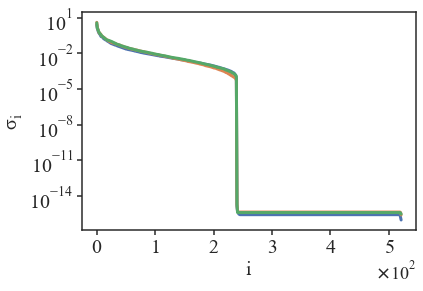

In [49]:
plt.rcParams["font.family"] = "Times New Roman"
from matplotlib import rc
fig, ax = plt.subplots()

ax.ticklabel_format(axis='both',style='sci', scilimits=(-2,2),useMathText=True)
ax.xaxis.get_offset_text().set_fontsize(18)
ax.yaxis.get_offset_text().set_fontsize(18)
ax.semilogy(np.arange(x_train_Al.shape[1]), S_Al, linewidth=3)
ax.semilogy(np.arange(x_train_Mg.shape[1]), S_Mg, linewidth=3)
ax.semilogy(np.arange(x_train_Zn.shape[1]), S_Zn, linewidth=3)

plt.yscale('log') 

ax.set_xlabel('$\mathregular{i}$', fontdict={'family' : 'Times New Roman', 'size':20})
ax.set_ylabel('$\mathregular{\sigma_i}$', fontdict={'family' : 'Times New Roman', 'size':20})
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=1.5,length=5)
ax.yaxis.set_tick_params(width=1.5,length=5)
plt.savefig('svd.png', dpi=1000, bbox_inches="tight", transparent=True)


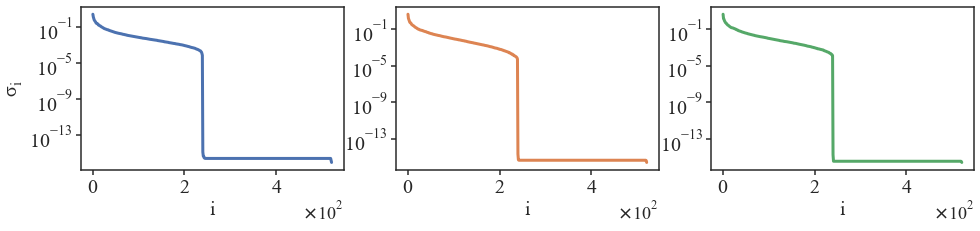

In [50]:
fig, axes = plt.subplots(1,3, figsize=(16, 3))

for ax in axes:
    ax.ticklabel_format(axis='both',style='sci', scilimits=(-2,2),useMathText=True)  
    ax.xaxis.get_offset_text().set_fontsize(18)
    ax.yaxis.get_offset_text().set_fontsize(18)

    
axes[0].semilogy(np.arange(x_train_Al.shape[1]), S_Al, linewidth=3, c='C0')
axes[1].semilogy(np.arange(x_train_Mg.shape[1]), S_Mg, linewidth=3, c='C1')
axes[2].semilogy(np.arange(x_train_Zn.shape[1]), S_Zn, linewidth=3, c='C2')

plt.yscale('log') 
axes[0].set_ylabel('$\mathregular{\sigma_i}$', fontdict={'family' : 'Times New Roman', 'size':20})

for ax in axes:

    ax.set_xlabel('$\mathregular{i}$', fontdict={'family' : 'Times New Roman', 'size':20})
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=1.5,length=5)
    ax.yaxis.set_tick_params(width=1.5,length=5)
plt.savefig('svd.png', dpi=1000, bbox_inches="tight", transparent=True)

PCS Dimensionality Reduction
146 principal components are needed to represent 99% of the total variation
The percentage reduction in dimension is: 72.03065134099617%
PCS Dimensionality Reduction
130 principal components are needed to represent 99% of the total variation
The percentage reduction in dimension is: 75.09578544061303%
PCS Dimensionality Reduction
139 principal components are needed to represent 99% of the total variation
The percentage reduction in dimension is: 73.37164750957854%


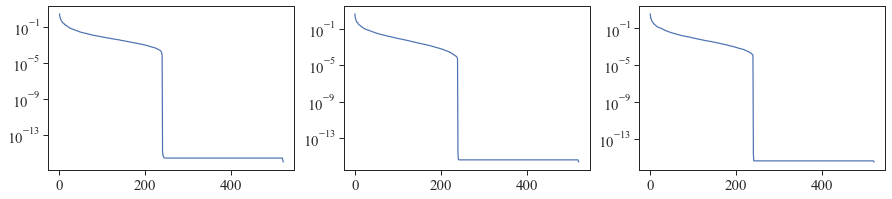

In [51]:
plt.rcParams["font.family"] = "Times New Roman"
from matplotlib import rc
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
# axes[0].semilogy(np.arange(x_train.shape[1]), S)
axes[0].semilogy(np.arange(x_train_Al.shape[1]), S_Al)
axes[1].semilogy(np.arange(x_train_Mg.shape[1]), S_Mg)
axes[2].semilogy(np.arange(x_train_Zn.shape[1]), S_Zn)
##################################################################################################################
for S_it in (S_Al, S_Mg, S_Zn):
    sum_of_S = np.sum(S_it)
    PERCENT = 99
    for i in range(S_it.shape[0]):
        if np.sum(S_it[:i]) > PERCENT/100*sum_of_S:
            break
    print('PCS Dimensionality Reduction')
    print(i, f'principal components are needed to represent {PERCENT}% of the total variation')
    print(f'The percentage reduction in dimension is: {(S_it.shape[0]-i)/S_it.shape[0]*100}%')


# fig, axes = plt.subplots(1, 4, figsize=(20, 3))
# axes[0].semilogy(np.arange(x_train.shape[1]), S)
# axes[1].semilogy(np.arange(x_train_Al.shape[1]), S_Al)
# axes[2].semilogy(np.arange(x_train_Mg.shape[1]), S_Mg)
# axes[3].semilogy(np.arange(x_train_Zn.shape[1]), S_Zn)
# ##################################################################################################################
# for S_it in (S, S_Al, S_Mg, S_Zn):
#     sum_of_S = np.sum(S_it)
#     PERCENT = 99
#     for i in range(S_it.shape[0]):
#         if np.sum(S_it[:i]) > PERCENT/100*sum_of_S:
#             break
#     print('PCS Dimensionality Reduction')
#     print(i, f'principal components are needed to represent {PERCENT}% of the total variation')
#     print(f'The percentage reduction in dimension is: {(S_it.shape[0]-i)/S_it.shape[0]*100}%')


In [52]:
NUM_FEATURES_1 = 42
NUM_FEATURES_2 = 130

In [53]:
x_train = x_train[:,:NUM_FEATURES_1]
x_test = x_test[:,:NUM_FEATURES_1]

In [54]:
x_train, y_train = x_train - mu_x, y_train - mean_y

x_train_Al, y_train_Al = (x_train_Al - mu_x_Al).dot(U_Al[:,:NUM_FEATURES_2]), y_train_Al - mean_y_Al
x_test_Al, y_test_Al = (x_test_Al - mu_x_Al).dot(U_Al[:,:NUM_FEATURES_2]), y_test_Al - mean_y_Al

x_train_Mg, y_train_Mg = (x_train_Mg - mu_x_Mg).dot(U_Mg[:,:NUM_FEATURES_2]), y_train_Mg - mean_y_Mg
x_test_Mg, y_test_Mg = (x_test_Mg - mu_x_Mg).dot(U_Mg[:,:NUM_FEATURES_2]), y_test_Mg - mean_y_Mg

x_train_Zn, y_train_Zn = (x_train_Zn - mu_x_Zn).dot(U_Zn[:,:NUM_FEATURES_2]), y_train_Zn - mean_y_Zn
x_test_Zn, y_test_Zn = (x_test_Zn - mu_x_Zn).dot(U_Zn[:,:NUM_FEATURES_2]), y_test_Zn - mean_y_Zn

In [55]:
lamd = 0.0001
lamd_Al = 0.1
lamd_Mg = 0.1
lamd_Zn = 0.1

theta = np.dot(np.linalg.inv(np.dot(x_train.T, x_train) + lamd * np.identity(NUM_FEATURES_1)),
               x_train.T).dot(y_train)

theta_Al = np.dot(np.linalg.inv(np.dot(x_train_Al.T, x_train_Al) + lamd_Al * np.identity(NUM_FEATURES_2)),
                  x_train_Al.T).dot(y_train_Al)

theta_Mg = np.dot(np.linalg.inv(np.dot(x_train_Mg.T, x_train_Mg) + lamd_Mg * np.identity(NUM_FEATURES_2)),
                  x_train_Mg.T).dot(y_train_Mg)

theta_Zn = np.dot(np.linalg.inv(np.dot(x_train_Zn.T, x_train_Zn) + lamd_Zn * np.identity(NUM_FEATURES_2)),
                  x_train_Zn.T).dot(y_train_Zn)

In [56]:
theta

array([-0.0288165 , -0.02392124,  0.01764937, -0.00210961, -0.00052916,
        0.03982841,  0.00249279,  0.01681911, -0.00975036,  0.00317943,
        0.01416468, -0.02736456, -0.00401184,  0.00346218, -0.00197353,
        0.0088305 , -0.00294631, -0.00336101, -0.01152407,  0.00464776,
       -0.00288036,  0.01096921,  0.00461818, -0.00583072,  0.0051513 ,
        0.00381283, -0.00311505,  0.00216346, -0.00105711, -0.00695543,
        0.00738754,  0.00442449,  0.0038964 , -0.00200273, -0.00885278,
       -0.00485292,  0.00225722,  0.00468422,  0.00324408, -0.00226421,
       -0.0036765 , -0.0042448 ])

In [57]:
def pred_e0_ls(row):
    if row['migration_atom'] == 'Al':
        return (np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Al).dot(U_Al[:, :NUM_FEATURES_2]))+
               np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Al).dot(U_Al[:, :NUM_FEATURES_2])))/2  + mean_y_Al
    elif row['migration_atom'] == 'Mg':
        return (np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Mg).dot(U_Mg[:, :NUM_FEATURES_2]))+
               np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Mg).dot(U_Mg[:, :NUM_FEATURES_2])))/2 + mean_y_Mg
    elif row['migration_atom'] == 'Zn':
        return (np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Zn).dot(U_Zn[:, :NUM_FEATURES_2]))+
               np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Zn).dot(U_Zn[:, :NUM_FEATURES_2])))/2  + mean_y_Zn
    else:
        raise RuntimeError('Unknown element')
        
def pred_de_ls(row):
    return np.inner(theta, (np.asarray(row['bond_change_encode_forward'])- mu_x)[:NUM_FEATURES_1]) + mean_y

        
def pred_barrier_ls(row):
    return row['predicted_e0'] + 0.5*(row['predicted_de'])
                                                                                                               

df['predicted_e0'] = df.apply(lambda row: pred_e0_ls(row), axis=1)
df_train['predicted_e0'] = df_train.apply(lambda row: pred_e0_ls(row), axis=1)
df_test['predicted_e0'] = df_test.apply(lambda row: pred_e0_ls(row), axis=1)

df['predicted_de'] = df.apply(lambda row: pred_de_ls(row), axis=1)
df_train['predicted_de'] = df_train.apply(lambda row: pred_de_ls(row), axis=1)
df_test['predicted_de'] = df_test.apply(lambda row: pred_de_ls(row), axis=1)


df['predicted_barrier'] = df['predicted_e0'] + 0.5*df['predicted_de']
df_train['predicted_barrier'] = df_train['predicted_e0'] + 0.5*df_train['predicted_de']
df_test['predicted_barrier'] = df_test['predicted_e0'] + 0.5*df_test['predicted_de']

In [58]:
df

,index,migration_atom,migration_system,migration_barriers,energy_difference,e0,energy_start,energy_end,distance,min_erg_distance,saddle_force,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,bond_change_encode_forward,bond_change_encode_backward,distance_list,energy_list,Landau_coef,a1,a2,predicted_e0,predicted_de,predicted_barrier
1720,860,Mg,Al-Mg,0.357523,0.107305,0.303870,-918.050627,-917.943322,2.484001,2.641265,-0.026092,"[0.75, 0.25, 0.0, 0.5, 0.5, 0.0, 0.0, 1.0, 0.0...","[0.75, 0.25, 0.0, 0.5, 0.5, 0.0, 0.0, 1.0, 0.0...","[1360.0, 142.0, 0.0, 22.0, 0.0, 0.0, 677.0, 75...","[1360.0, 141.0, 0.0, 23.0, 0.0, 0.0, 677.0, 77...","[0.0, -1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0,...","[0.0, 1.0, 0.0, -1.0, 0.0, 0.0, 0.0, -2.0, 0.0...","[0.0, 0.471567, 0.937999, 1.406678, 1.816807, ...","[0.0, 0.092386, 0.26523, 0.357523, 0.301384000...","[0.09901636175048706, -0.5347039000882543, 0.7...",0.736910,0.644622,0.334987,0.092925,0.381449
952,476,Mg,Al-Mg,0.507319,0.071214,0.471712,-918.239852,-918.168638,2.825938,3.126889,-0.013793,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 0.0, 1.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 0.0, 1.0, 0.0, ...","[1358.0, 148.0, 0.0, 18.0, 0.0, 0.0, 690.0, 48...","[1358.0, 145.0, 0.0, 21.0, 0.0, 0.0, 690.0, 51...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 0.0,...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, -3.0, 0.0...","[0.0, 0.543611, 1.086557, 1.629817, 2.123243, ...","[0.0, 0.127301, 0.377181, 0.507319, 0.4083, 0....","[0.07885378150813958, -0.4977926714672769, 0.7...",0.792838,0.749137,0.489216,0.116040,0.547236
850,425,Al,Al-Mg-Zn,0.599848,-0.057632,0.628664,-918.059446,-918.117078,2.966336,3.322786,0.006403,"[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 1.0, 0.0, 0...","[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 1.0, 0.0, 0...","[1362.0, 59.0, 89.0, 3.0, 5.0, 6.0, 696.0, 18....","[1363.0, 60.0, 87.0, 3.0, 5.0, 6.0, 693.0, 19....","[1.0, 1.0, -2.0, 0.0, 0.0, 0.0, -3.0, 1.0, 2.0...","[-1.0, -1.0, 2.0, 0.0, 0.0, 0.0, 3.0, -1.0, -2...","[0.0, 0.541107, 1.080756, 1.617155, 2.18650999...","[0.0, 0.142119, 0.450825, 0.5998479999999999, ...","[0.0824801625900323, -0.5449860009321041, 0.89...",0.894996,0.926315,0.637101,-0.075707,0.599248
639,319,Zn,Al-Mg-Zn,0.219129,-0.068946,0.253602,-846.676136,-846.745082,2.763912,2.975222,-0.009252,"[0.25, 0.25, 0.5, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[0.25, 0.25, 0.5, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[1122.0, 98.0, 176.0, 19.0, 75.0, 34.0, 559.0,...","[1122.0, 98.0, 172.0, 19.0, 79.0, 34.0, 559.0,...","[0.0, 0.0, -4.0, 0.0, 4.0, 0.0, 0.0, 0.0, 1.0,...","[0.0, 0.0, 4.0, 0.0, -4.0, 0.0, 0.0, 0.0, -1.0...","[0.0, 0.4856880000000001, 0.963244, 1.44157400...","[0.0, 0.06950100000000001, 0.17502799999999996...","[0.051555994580636796, -0.3015452840326976, 0....",0.433004,0.479737,0.297580,-0.094694,0.250233
1240,620,Zn,Al-Mg-Zn,0.307175,0.116130,0.249110,-834.887374,-834.771244,2.615069,2.828308,-0.011936,"[0.0, 0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 0.0, 1.0, ...","[0.0, 0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 0.0, 1.0, ...","[1084.0, 121.0, 171.0, 52.0, 68.0, 28.0, 535.0...","[1084.0, 121.0, 170.0, 52.0, 68.0, 29.0, 535.0...","[0.0, 0.0, -1.0, 0.0, 0.0, 1.0, 0.0, 0.0, -2.0...","[0.0, 0.0, 1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 2.0,...","[0.0, 0.5048239999999999, 1.004445, 1.504466, ...","[0.0, 0.087125, 0.237118, 0.307175, 0.258755, ...","[0.06139888019847513, -0.3575757239678778, 0.5...",0.534702,0.447597,0.252600,0.076205,0.290702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,521,Al,Al-Mg-Zn,0.467309,-0.088628,0.511623,-918.442900,-918.531529,2.906280,3.192324,0.012275,"[0.5, 0.25, 0.25, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0...","[0.5, 0.25, 0.25, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0...","[1362.0, 67.0, 81.0, 3.0, 9.0, 2.0, 696.0, 21....","[1363.0, 67.0, 80.0, 3.0, 9.0, 2.0, 693.0, 23....","[1.0, 0.0, -1.0, 0.0, 0.0, 0.0, -3.0, 2.0, 1.0...","[-1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 3.0, -2.0, -1....","[0.0, 0.510544, 1.016317, 1.519215, 2.074919, ...","[0

rmse train 0.06822376930342385 0.5905078122180589
rmse test 0.06217477861469489 0.6419810694827304


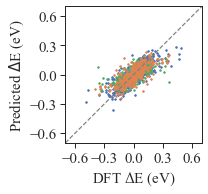

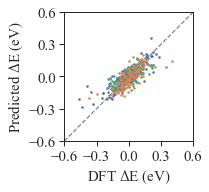

In [59]:
ele_list = ['Zn', 'Mg', 'Al']

sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })
lim_range = [-0.7, 0.7]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, legend_out=True, hue='migration_atom', hue_order=ele_list,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_difference', 'predicted_de', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\Delta$E (eV)')
for ax in g.axes.flat:
#     ax.set_title('Bond counting model (Testing)')
    ax.set_xlabel(xlabel='DFT $\mathregular{\Delta E}$ (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-0.6, 0.9, 0.3), yticks=np.arange(-0.6, 0.9, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('ediff_pred_train.png', dpi=1000, transparent=True)

print('rmse train',
      np.sqrt(mean_squared_error(df_train['energy_difference'], df_train['predicted_de'])),
      r2_score(df_train['energy_difference'], df_train['predicted_de']))
###################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [-0.6, 0.6]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, legend_out=True, hue='migration_atom', hue_order=ele_list,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_difference', 'predicted_de', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{\Delta E}$ (eV)')
for ax in g.axes.flat:
#     ax.set_title('Bond counting model (Testing)')
    ax.set_xlabel(xlabel='DFT $\mathregular{\Delta E}$ (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-0.6, 0.9, 0.3), yticks=np.arange(-0.6, 0.9, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('ediff_pred_test.png', dpi=1000, transparent=True)

print('rmse test', 
      np.sqrt(mean_squared_error(df_test['energy_difference'], df_test['predicted_de'])),
      r2_score(df_test['energy_difference'], df_test['predicted_de']))

rmse train 0.02954569691602188 0.9706599995169847
rmse test 0.03985566979975075 0.9426062201208395


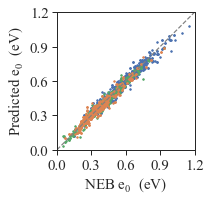

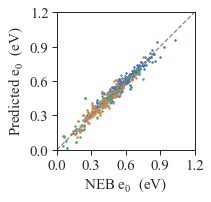

In [60]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, hue='migration_atom', legend_out=True,
                  hue_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'e0', 'predicted_e0', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{e_0}$  (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB $\mathregular{e_0}$  (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('e0_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['e0'], df_train['predicted_e0'])),
     r2_score(df_train['e0'], df_train['predicted_e0']))
###########################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test,  hue='migration_atom', legend_out=True,
                  hue_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'e0', 'predicted_e0', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{e_0}$  (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB $\mathregular{e_0}$  (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Testing)', size=20)

g.savefig('e0_pred_test.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['e0'], df_test['predicted_e0'])),
     r2_score(df_test['e0'], df_test['predicted_e0']))

rmse train 0.04445758142633702 0.9391579101346944
rmse test 0.052019163414795885 0.9095469900426186


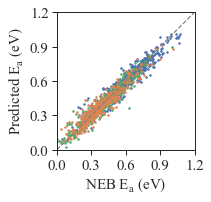

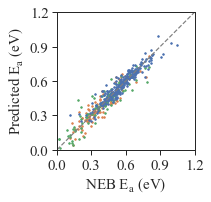

In [61]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, hue='migration_atom', legend_out=True,
                  hue_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{E_a}$ (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB $\mathregular{E_a}$ (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('', size=20)

g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['migration_barriers'], df_train['predicted_barrier'])),
                 r2_score(df_train['migration_barriers'], df_train['predicted_barrier']))
##################################################################################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=3,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{E_a}$ (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB $\mathregular{E_a}$ (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('', size=20)

g.savefig('barrier_pred_test.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['migration_barriers'], df_test['predicted_barrier'])),
           r2_score(df_test['migration_barriers'], df_test['predicted_barrier']))

In [27]:
js_dist = {
    'Al' : {'transform_matrix' :  U_Al[:, :NUM_FEATURES_2].T.tolist(), 'mu_x' : mu_x_Al.tolist(), 'mean_y': mean_y_Al.tolist(), 'theta': theta_Al.tolist()},
    'Mg' : {'transform_matrix' :  U_Mg[:, :NUM_FEATURES_2].T.tolist(), 'mu_x' : mu_x_Mg.tolist(), 'mean_y': mean_y_Mg.tolist(), 'theta': theta_Mg.tolist()},
    'Zn' : {'transform_matrix' :  U_Zn[:, :NUM_FEATURES_2].T.tolist(), 'mu_x' : mu_x_Zn.tolist(), 'mean_y': mean_y_Zn.tolist(), 'theta': theta_Zn.tolist()},
    'Bond' : {'theta' : theta.tolist()}}
with open('kmc_parameters.json', 'w') as outfile:
    json.dump(js_dist, outfile)

<AxesSubplot:xlabel='migration_barriers', ylabel='Count'>

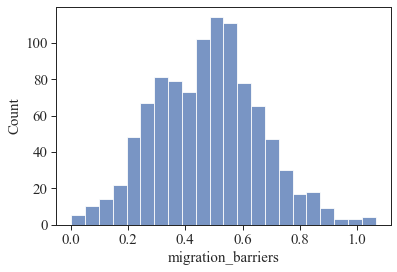

In [28]:
sns.histplot(data = df[:1000], x='migration_barriers')

<AxesSubplot:xlabel='migration_barriers', ylabel='Count'>

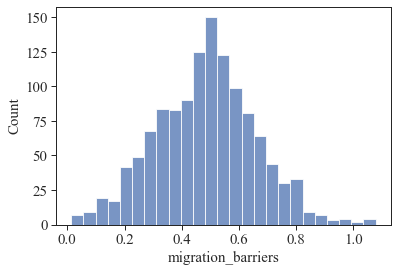

In [29]:
sns.histplot(data = df[1000:2260], x='migration_barriers')